In [1]:
from tensorflow import keras
from tensorflow.keras.models import Sequential

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.layers import LSTM, Dense

from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.model_selection import cross_val_score

In [2]:
# 데이터 불러오기
df = pd.read_csv('../data/df.csv')

In [3]:
df.head()

,동,단지명,전용면적,계약년월,층,건축년도,금리,부동산소비심리,보증금
0,165,2059,79.97,201601,4,1987,1.5,117.6,44000
1,165,2059,79.97,201601,3,1987,1.5,117.6,42000
2,165,453,133.46,201601,8,1984,1.5,117.6,80000
3,165,453,104.43,201601,6,1984,1.5,117.6,52000
4,165,453,104.43,201601,3,1984,1.5,117.6,55000


In [4]:
df.describe()

,동,단지명,전용면적,계약년월,층,건축년도,금리,부동산소비심리,보증금
count,320979.000000,320979.000000,320979.000000,320979.000000,320979.000000,320979.000000,320979.000000,320979.000000,320979.000000
mean,153.538200,2682.592419,76.076619,201711.545668,10.691213,1998.759458,1.388802,118.405118,39010.146888
std,88.406449,1679.933238,26.141417,82.104811,5.780531,10.723342,0.140256,8.987102,18613.787295
min,0.000000,0.000000,10.110000,201601.000000,0.000000,1961.000000,1.250000,93.900000,500.000000
25%,70.000000,1352.000000,59.680000,201610.000000,6.000000,1990.000000,1.250000,113.100000,26000.000000
50%,159.000000,2269.000000,80.920000,201707.000000,10.000000,1999.000000,1.500000,119.200000,37000.000000
75%,235.000000,3925.000000,84.960000,201804.000000,14.000000,2007.000000,1.500000,126.300000,50000.000000
max,331.000000,6632.000000,317.360000,201812.000000,68.000000,2018.000000,1.750000,134.100000,100000.000000


In [5]:
# 정규화하기
# MinMaxScaler 클래스 생성
scaler = MinMaxScaler()

# MinMaxScaler 클래스의 fit_transform() 메서드 사용 데이터 정규화
normalized_data = scaler.fit_transform(df)

# 정규화된 데이터, 데이터 프레임으로 다시 변환
normalized_df = pd.DataFrame(normalized_data, columns=df.columns)

In [6]:
normalized_df.head()

,동,단지명,전용면적,계약년월,층,건축년도,금리,부동산소비심리,보증금
0,0.498489,0.310464,0.227372,0.0,0.058824,0.456140,0.5,0.589552,0.437186
1,0.498489,0.310464,0.227372,0.0,0.044118,0.456140,0.5,0.589552,0.417085
2,0.498489,0.068305,0.401465,0.0,0.117647,0.403509,0.5,0.589552,0.798995
3,0.498489,0.068305,0.306981,0.0,0.088235,0.403509,0.5,0.589552,0.517588
4,0.498489,0.068305,0.306981,0.0,0.044118,0.403509,0.5,0.589552,0.547739


In [7]:
ndf = normalized_df.copy()

In [8]:
# 데이터 나누기
X = ndf.iloc[:, :-1]
y = ndf.iloc[:,[-1]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [9]:
pd.DataFrame(X_test).to_csv('../data/X_test.csv', index=False)
pd.DataFrame(y_test).to_csv('../data/y_test.csv', index=False)

In [10]:
X_test = pd.read_csv('../data/X_test.csv')
y_test = pd.read_csv('../data/y_test.csv')

In [11]:
X_test.head()

,동,단지명,전용면적,계약년월,층,건축년도,금리,부동산소비심리
0,0.060423,0.063329,0.243548,0.985782,0.161765,0.807018,0.5,0.803483
1,0.129909,0.385253,0.138747,0.004739,0.132353,0.350877,0.5,0.651741
2,0.341390,0.246230,0.243111,0.488152,0.073529,0.771930,0.0,0.629353
3,0.785498,0.264174,0.149474,1.000000,0.117647,0.754386,1.0,0.000000
4,0.830816,0.711399,0.191212,0.018957,0.117647,0.473684,0.5,0.808458


In [12]:
y_test.head()

,보증금
0,0.688442
1,0.346734
2,0.497487
3,0.346734
4,0.256281


In [13]:
print(X_train.shape)
print(y_train.shape)

(256783, 8)
(256783, 1)


In [14]:
print(X_test.shape)
print(y_test.shape)

(64196, 8)
(64196, 1)


In [15]:
model = Sequential()
model.add(LSTM(128, input_shape=(ndf.shape[1] - 1, 1)))
model.add(Dense(1))
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01), loss='mse')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

Epoch 1/10
8025/8025 [==============================] - 33s 4ms/step - loss: 0.0316
Epoch 2/10
8025/8025 [==============================] - 31s 4ms/step - loss: 0.0213
Epoch 3/10
8025/8025 [==============================] - 32s 4ms/step - loss: 0.0169
Epoch 4/10
8025/8025 [==============================] - 32s 4ms/step - loss: 0.0159
Epoch 5/10
8025/8025 [==============================] - 33s 4ms/step - loss: 0.0157
Epoch 6/10
8025/8025 [==============================] - 32s 4ms/step - loss: 0.0156
Epoch 7/10
8025/8025 [==============================] - 32s 4ms/step - loss: 0.0156
Epoch 8/10
8025/8025 [==============================] - 32s 4ms/step - loss: 0.0155
Epoch 9/10
8025/8025 [==============================] - 31s 4ms/step - loss: 0.0154
Epoch 10/10
8025/8025 [==============================] - 32s 4ms/step - loss: 0.0154


In [17]:
pred = model.predict(X_test)
print(y_test.shape, pred.shape)

2007/2007 [==============================] - 4s 2ms/step
(64196, 1) (64196, 1)


In [18]:
# 실제값과 예측값을 계약년월별 평균값으로 계산
predictions = np.array(pred)
actual_values = np.array(y_test)

In [19]:
contract_year_predictions = np.array([predictions[i:i + 12].mean() for i in range(0, len(predictions), 12)])
contract_year_actual_values = np.array([actual_values[i:i + 12].mean() for i in range(0, len(actual_values), 12)])

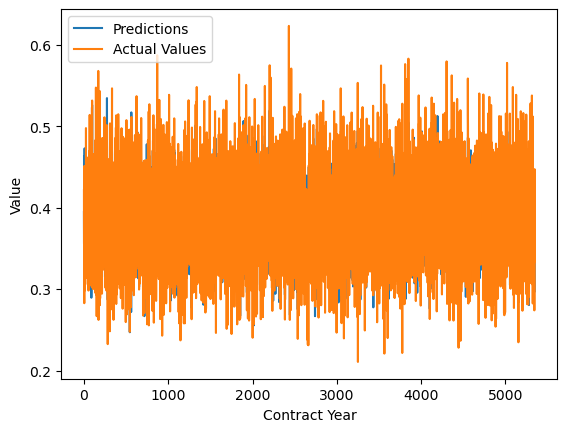

In [20]:
plt.plot(contract_year_predictions, label="Predictions", linestyle='solid')
plt.plot(contract_year_actual_values, label="Actual Values")
plt.xlabel("Contract Year")
plt.ylabel("Value")
plt.legend()
plt.show()

In [21]:
# RMSE를 계산(낮을 수록 정확함)
rmse = mean_squared_error(y_test, predictions)
print('rmse :',rmse)

# R^2을 계산(R^2가 1에 가까울수록 모델이 데이터를 잘 설명)
r2 = r2_score(y_test, predictions)
print('r2 :',r2)

# MAE를 계산(MAE가 낮을수록 예측값과 실제값이 가까워짐)
mae = mean_absolute_error(y_test, predictions)
print('mae :',mae)

rmse : 0.015364043350623764
r2 : 0.5613202901157028
mae : 0.09254171521856347


In [23]:
# 계약년월을 기준으로 그룹핑을 합니다.
df_mean = df.groupby('계약년월')['보증금'].mean()

In [24]:
df_mean

계약년월
201601    36890.038096
201602    35449.676327
201603    34559.563102
201604    34928.067398
201605    36347.804235
201606    37026.997471
201607    36044.919882
201608    35499.391133
201609    37310.437418
201610    38790.171271
201611    39276.176147
201612    40789.602979
201701    39552.181829
201702    38442.548583
201703    37001.654835
201704    38238.596794
201705    38444.156503
201706    38308.968900
201707    38631.311260
201708    37868.142969
201709    39020.065737
201710    39331.802162
201711    41292.052638
201712    41946.613463
201801    41205.055759
201802    40172.497791
201803    39456.268185
201804    39304.877134
201805    39401.404901
201806    40542.906301
201807    40033.113482
201808    40175.420574
201809    40848.639097
201810    41695.576178
201811    42500.864625
201812    43545.275127
Name: 보증금, dtype: float64

In [25]:
X_test['예측값'] = pred

In [26]:
X_test.head()

,동,단지명,전용면적,계약년월,층,건축년도,금리,부동산소비심리,예측값
0,0.885196,0.840470,0.097055,0.033175,0.176471,0.929825,0.0,0.910448,0.094911
1,0.066465,0.049759,0.243092,0.009479,0.117647,0.824561,0.5,0.629353,0.791976
2,0.507553,0.736882,0.243548,0.995261,0.044118,0.807018,0.5,0.313433,0.266512
3,0.090634,0.034379,0.243613,0.047393,0.044118,0.421053,0.0,0.495025,0.708464
4,0.480363,0.255127,0.195574,0.516588,0.058824,0.456140,0.0,0.641791,0.382034


In [27]:
pd.DataFrame(X_test).to_csv('../data/X_result.csv', index=False)

In [28]:
result = pd.read_csv('../data/X_result.csv')

In [29]:
result.head()

,동,단지명,전용면적,계약년월,층,건축년도,금리,부동산소비심리,예측값
0,0.885196,0.840470,0.097055,0.033175,0.176471,0.929825,0.0,0.910448,0.094911
1,0.066465,0.049759,0.243092,0.009479,0.117647,0.824561,0.5,0.629353,0.791976
2,0.507553,0.736882,0.243548,0.995261,0.044118,0.807018,0.5,0.313433,0.266512
3,0.090634,0.034379,0.243613,0.047393,0.044118,0.421053,0.0,0.495025,0.708464
4,0.480363,0.255127,0.195574,0.516588,0.058824,0.456140,0.0,0.641791,0.382034


In [30]:
result = pd.concat([result, y_test], axis=1)

In [31]:
result.head()

,동,단지명,전용면적,계약년월,층,건축년도,금리,부동산소비심리,예측값,보증금
0,0.885196,0.840470,0.097055,0.033175,0.176471,0.929825,0.0,0.910448,0.094911,0.071095
1,0.066465,0.049759,0.243092,0.009479,0.117647,0.824561,0.5,0.629353,0.791976,0.768844
2,0.507553,0.736882,0.243548,0.995261,0.044118,0.807018,0.5,0.313433,0.266512,0.246231
3,0.090634,0.034379,0.243613,0.047393,0.044118,0.421053,0.0,0.495025,0.708464,0.688442
4,0.480363,0.255127,0.195574,0.516588,0.058824,0.456140,0.0,0.641791,0.382034,0.396985


In [32]:
result = result[['동', '단지명', '전용면적', '계약년월', '층', '건축년도', '금리', '부동산소비심리', '예측값', '보증금']]

In [33]:
result.head()

,동,단지명,전용면적,계약년월,층,건축년도,금리,부동산소비심리,예측값,보증금
0,0.885196,0.840470,0.097055,0.033175,0.176471,0.929825,0.0,0.910448,0.094911,0.071095
1,0.066465,0.049759,0.243092,0.009479,0.117647,0.824561,0.5,0.629353,0.791976,0.768844
2,0.507553,0.736882,0.243548,0.995261,0.044118,0.807018,0.5,0.313433,0.266512,0.246231
3,0.090634,0.034379,0.243613,0.047393,0.044118,0.421053,0.0,0.495025,0.708464,0.688442
4,0.480363,0.255127,0.195574,0.516588,0.058824,0.456140,0.0,0.641791,0.382034,0.396985


In [34]:
result = result.groupby('계약년월').mean()
result = result[['보증금', '예측값']]

In [35]:
print(result)

               보증금       예측값
계약년월                        
0.000000  0.362120  0.362928
0.004739  0.354594  0.357975
0.009479  0.344907  0.350313
0.014218  0.346538  0.350392
0.018957  0.348332  0.350796
0.023697  0.359644  0.359717
0.028436  0.359922  0.359572
0.033175  0.349641  0.354626
0.037915  0.375077  0.369621
0.042654  0.385391  0.377150
0.047393  0.392834  0.386482
0.052133  0.407924  0.405396
0.473934  0.388006  0.389289
0.478673  0.381477  0.385223
0.483412  0.362019  0.371034
0.488152  0.385883  0.388146
0.492891  0.380351  0.378188
0.497630  0.381554  0.378080
0.502370  0.382213  0.375286
0.507109  0.376631  0.373243
0.511848  0.389992  0.377112
0.516588  0.390594  0.380961
0.521327  0.408907  0.397202
0.526066  0.415363  0.405368
0.947867  0.404829  0.403733
0.952607  0.404563  0.404138
0.957346  0.389124  0.388530
0.962085  0.390689  0.390369
0.966825  0.398179  0.403761
0.971564  0.403312  0.403241
0.976303  0.395421  0.396706
0.981043  0.396978  0.395304
0.985782  0.40

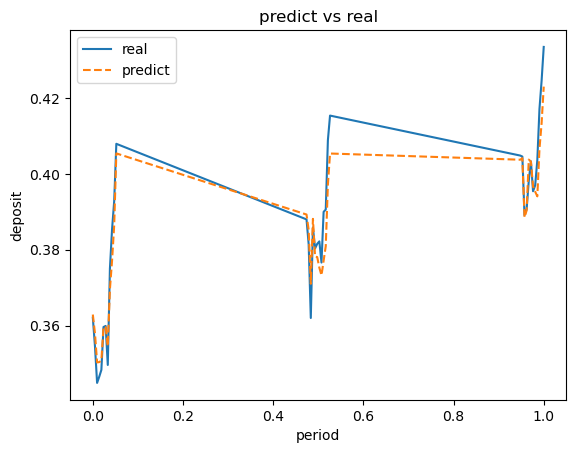

In [40]:
plt.plot(result['보증금'], label='real')
plt.plot(result['예측값'], linestyle='--', label='predict')
plt.title('predict vs real')
plt.xlabel('period')
plt.ylabel('deposit')
plt.legend()
plt.show()

In [44]:
# 본래값 확인해보기
# 201601
print('실제값 : ',0.362120 * (100000.0-500.0)+500)
print('예측값 : ',0.362928 * (100000.0-500.0)+500)

#201602
print('실제값 : ',0.362120 * (100000.0-500.0)+500)
print('예측값 : ',0.362928 * (100000.0-500.0)+500)

# 201603
print('실제값 : ',0.344907 * (100000.0-500.0)+500)
print('예측값 : ',0.350313 * (100000.0-500.0)+500)

실제값 :  36530.94
예측값 :  36611.335999999996
실제값 :  36530.94
예측값 :  36611.335999999996
실제값 :  34818.2465
예측값 :  35356.1435


In [45]:
result = pd.DataFrame({
  '계약년월': ['201601', '201602', '201603', '201604', '201605', '201606','201607', '201608', '201609','201610', '201611', '201612', 
                 '201701', '201702', '201703', '201704', '201705', '201706', '201707', '201708', '201709', '201710', '201711', '201712',
                 '201801', '201802', '201803', '201804', '201805', '201806', '201807', '201808', '201809', '201810', '201811', '201812'],
  '실제값': [0.362120 * (100000.0-500.0)+500, 0.362120 * (100000.0-500.0)+500, 0.344907 * (100000.0-500.0)+500,
              0.346538 * (100000.0-500.0)+500, 0.348332 * (100000.0-500.0)+500, 0.359644 * (100000.0-500.0)+500,
              0.359922 * (100000.0-500.0)+500, 0.349641 * (100000.0-500.0)+500, 0.375077 * (100000.0-500.0)+500,
              0.385391 * (100000.0-500.0)+500, 0.392834 * (100000.0-500.0)+500, 0.407924 * (100000.0-500.0)+500,
              0.388006 * (100000.0-500.0)+500, 0.381477 * (100000.0-500.0)+500, 0.362019 * (100000.0-500.0)+500,
              0.385883 * (100000.0-500.0)+500, 0.380351 * (100000.0-500.0)+500, 0.381554 * (100000.0-500.0)+500,
              0.382213 * (100000.0-500.0)+500, 0.376631 * (100000.0-500.0)+500, 0.389992 * (100000.0-500.0)+500,
              0.390594 * (100000.0-500.0)+500, 0.408907 * (100000.0-500.0)+500, 0.415363 * (100000.0-500.0)+500,
              0.404829 * (100000.0-500.0)+500, 0.404563 * (100000.0-500.0)+500, 0.389124 * (100000.0-500.0)+500,
              0.390689 * (100000.0-500.0)+500, 0.398179 * (100000.0-500.0)+500, 0.403312 * (100000.0-500.0)+500,
              0.395421 * (100000.0-500.0)+500, 0.396978 * (100000.0-500.0)+500, 0.403635 * (100000.0-500.0)+500,
              0.417093 * (100000.0-500.0)+500, 0.424506 * (100000.0-500.0)+500, 0.433460 * (100000.0-500.0)+500 ],
  '예측값': [0.362928 * (100000.0-500.0)+500, 0.362928 * (100000.0-500.0)+500, 0.350313 * (100000.0-500.0)+500,
              0.350392 * (100000.0-500.0)+500, 0.350796 * (100000.0-500.0)+500, 0.359717 * (100000.0-500.0)+500,
              0.359572 * (100000.0-500.0)+500, 0.354626 * (100000.0-500.0)+500, 0.369621 * (100000.0-500.0)+500,
              0.377150 * (100000.0-500.0)+500, 0.386482 * (100000.0-500.0)+500, 0.405396 * (100000.0-500.0)+500,
              0.389289 * (100000.0-500.0)+500, 0.385223 * (100000.0-500.0)+500, 0.371034 * (100000.0-500.0)+500,
              0.388146 * (100000.0-500.0)+500, 0.378188 * (100000.0-500.0)+500, 0.378080 * (100000.0-500.0)+500,
              0.375286 * (100000.0-500.0)+500, 0.373243 * (100000.0-500.0)+500, 0.377112 * (100000.0-500.0)+500,
              0.380961 * (100000.0-500.0)+500, 0.397202 * (100000.0-500.0)+500, 0.405368 * (100000.0-500.0)+500,
              0.403733 * (100000.0-500.0)+500, 0.404138 * (100000.0-500.0)+500, 0.388530 * (100000.0-500.0)+500,
              0.390369 * (100000.0-500.0)+500, 0.403761 * (100000.0-500.0)+500, 0.403241 * (100000.0-500.0)+500,
              0.396706 * (100000.0-500.0)+500, 0.395304 * (100000.0-500.0)+500, 0.394079 * (100000.0-500.0)+500,
              0.406537 * (100000.0-500.0)+500, 0.413349 * (100000.0-500.0)+500, 0.422997 * (100000.0-500.0)+500 ]
})

In [47]:
result

,계약년월,실제값,예측값
0,201601,36530.9400,36611.3360
1,201602,36530.9400,36611.3360
2,201603,34818.2465,35356.1435
3,201604,34980.5310,35364.0040
4,201605,35159.0340,35404.2020
5,201606,36284.5780,36291.8415
6,201607,36312.2390,36277.4140
7,201608,35289.2795,35785.2870
8,201609,37820.1615,37277.2895
9,201610,38846.4045,38026.4250


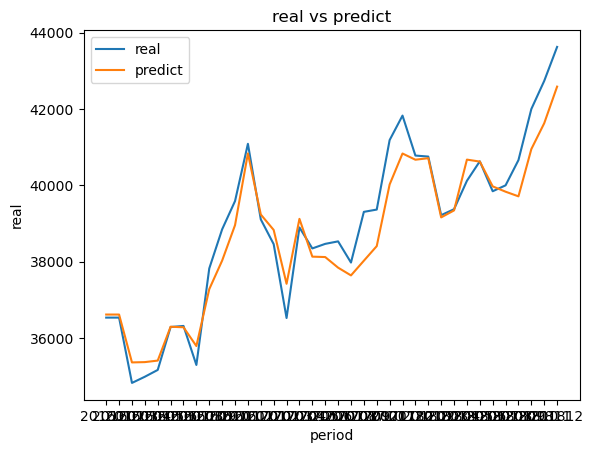

In [49]:
plt.plot(result['계약년월'], result['실제값'], label='real')
plt.plot(result['계약년월'], result['예측값'], label='predict')

plt.xlabel('period')
plt.ylabel('real')
plt.title('real vs predict')
plt.legend()

plt.show()